In [82]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os as path

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv("data/mouse_drug_data.csv")
clinicaltrial_data = pd.read_csv("data/clinicaltrial_data.csv")

# Combine the data into a single dataset
mousedrug_clinicaltrial_combine = pd.merge(clinicaltrial_data, mouse_drug_data,how='outer', on="Mouse ID")

# Display the data table for preview
mousedrug_clinicaltrial_combine.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [10]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
combine_group_mean = mousedrug_clinicaltrial_combine.groupby(["Drug","Timepoint"]).mean()
combine_group_mean.reset_index(level = None, inplace = True)

# Convert to DataFrame
tumor_response_mean_df = pd.DataFrame(combine_group_mean)

# Preview DataFrame
tumor_response_mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [64]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
combine_sem = mousedrug_clinicaltrial_combine.groupby(["Drug","Timepoint"]).sem()
combine_sem.reset_index(level = None, inplace = True)

# Convert to DataFrame
pd.DataFrame(combine_sem)


,Drug,Timepoint,Metastatic Sites,Mouse ID,Tumor Volume (mm3)
0,Capomulin,0,0.000000,NaN,0.000000
1,Capomulin,5,0.074833,NaN,0.448593
2,Capomulin,10,0.125433,NaN,0.702684
3,Capomulin,15,0.132048,NaN,0.838617
4,Capomulin,20,0.161621,NaN,0.909731
...,...,...,...,...,...
95,Zoniferol,25,0.236621,NaN,0.602513
96,Zoniferol,30,0.248168,NaN,0.800043
97,Zoniferol,35,0.285714,NaN,0.881426
98,Zoniferol,40,0.299791,NaN,0.998515


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [65]:
# Minor Data Munging to Re-Format the Data Frames
pivot_table = tumor_response_mean_df.pivot(index ="Timepoint", columns = 'Drug', values = "Tumor Volume (mm3)")
pivot_table.reset_index(level = None, inplace = True)

# Preview that Reformatting worked
pivot_table.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [70]:
#Calculate standard error for each drug
drug_sem=pivot_table.sem()
drug_sem

Drug
Timepoint    4.787136
Capomulin    0.970903
Ceftamin     2.047757
Infubinol    2.205969
Ketapril     2.671728
Naftisol     2.616691
Placebo      2.479069
Propriva     2.220042
Ramicane     1.031031
Stelasyn     2.489156
Zoniferol    2.217328
dtype: float64

In [76]:
#Table for 4 drugs: Capomulin, Infubinol, Ketapril, Placebo
table_Capomulin_Infubinol_Ketapril_Placebo = pivot_table[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
table_Capomulin_Infubinol_Ketapril_Placebo.head()

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417


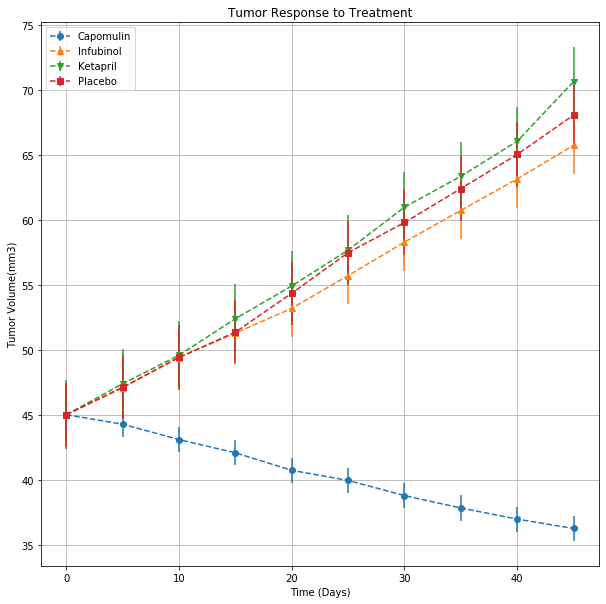

In [102]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (10,10))
plt.errorbar(x=table_Capomulin_Infubinol_Ketapril_Placebo['Timepoint'],y=table_Capomulin_Infubinol_Ketapril_Placebo['Capomulin'], linestyle="--", yerr=0.970903, fmt='o', label="Capomulin")
plt.errorbar(x=table_Capomulin_Infubinol_Ketapril_Placebo['Timepoint'],y=table_Capomulin_Infubinol_Ketapril_Placebo['Infubinol'], linestyle="--", yerr=2.205969, fmt='^', label="Infubinol")
plt.errorbar(x=table_Capomulin_Infubinol_Ketapril_Placebo['Timepoint'],y=table_Capomulin_Infubinol_Ketapril_Placebo['Ketapril'], linestyle="--", yerr=2.671728, fmt='v', label="Ketapril")
plt.errorbar(x=table_Capomulin_Infubinol_Ketapril_Placebo['Timepoint'],y=table_Capomulin_Infubinol_Ketapril_Placebo['Placebo'], linestyle="--", yerr=2.479069, fmt='s', label="Placebo")

plt.ylabel('Tumor Volume(mm3)')
plt.xlabel('Time (Days)')
plt.title('Tumor Response to Treatment')
plt.legend()
plt.grid()

# Save the Figure to a png in the "figures" folder
import os
path = os.path.join(os.path.expanduser("~"), "figures", "Tumor_Response_To_Treatment.png")

In [109]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [49]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
combine_group_sem = mousedrug_clinicaltrial_combine.groupby(["Drug","Timepoint"]).sem()

# Convert to DataFrame
met_response_sem_df = pd.DataFrame(combine_group_sem)

# Preview DataFrame
met_response_sem_df.head()

Metastatic Sites  Mouse ID  Tumor Volume (mm3)
Drug      Timepoint                                                
Capomulin 0                  0.000000       NaN            0.000000
          5                  0.074833       NaN            0.448593
          10                 0.125433       NaN            0.702684
          15                 0.132048       NaN            0.838617
          20                 0.161621       NaN            0.909731

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [51]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
combine_sem = mousedrug_clinicaltrial_combine.groupby(["Drug","Timepoint"]).sem()
combine_sem.reset_index(level = None, inplace = True)

# Convert to DataFrame
tumor_volume_sem_df = pd.DataFrame(combine_sem)

# Preview DataFrame 
tumor_volume_sem_df.head()

,Drug,Timepoint,Metastatic Sites,Mouse ID,Tumor Volume (mm3)
0,Capomulin,0,0.000000,NaN,0.000000
1,Capomulin,5,0.074833,NaN,0.448593
2,Capomulin,10,0.125433,NaN,0.702684
3,Capomulin,15,0.132048,NaN,0.838617
4,Capomulin,20,0.161621,NaN,0.909731


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [150]:
# Minor Data Munging to Re-Format the Data Frames
pivot_table1 = tumor_response_mean_df.pivot(index ="Timepoint", columns = 'Drug', values = "Tumor Volume (mm3)")
pivot_table1.reset_index(level = None, inplace = True)

# Preview that Reformatting worked
pivot_table1.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [151]:
#Calculate standard error for each drug
drug_sem1=pivot_table1.sem()
drug_sem1

Drug
Timepoint    4.787136
Capomulin    0.970903
Ceftamin     2.047757
Infubinol    2.205969
Ketapril     2.671728
Naftisol     2.616691
Placebo      2.479069
Propriva     2.220042
Ramicane     1.031031
Stelasyn     2.489156
Zoniferol    2.217328
dtype: float64

In [152]:
#Table for 4 drugs: Capomulin, Infubinol, Ketapril, Placebo
table_Capomulin_Infubinol_Ketapril_Placebo = pivot_table2[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
table_Capomulin_Infubinol_Ketapril_Placebo.head()

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417


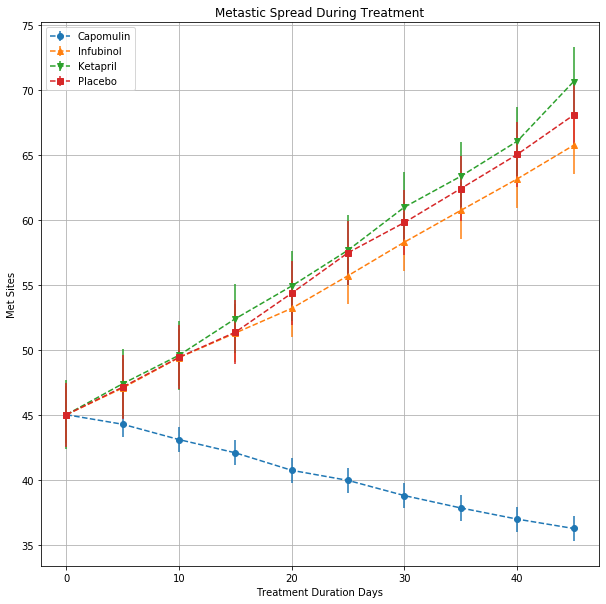

In [153]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (10,10))
plt.errorbar(x=table_Capomulin_Infubinol_Ketapril_Placebo['Timepoint'],y=table_Capomulin_Infubinol_Ketapril_Placebo['Capomulin'], linestyle="--", yerr=0.970903, fmt='o', label="Capomulin")
plt.errorbar(x=table_Capomulin_Infubinol_Ketapril_Placebo['Timepoint'],y=table_Capomulin_Infubinol_Ketapril_Placebo['Infubinol'], linestyle="--", yerr=2.205969, fmt='^', label="Infubinol")
plt.errorbar(x=table_Capomulin_Infubinol_Ketapril_Placebo['Timepoint'],y=table_Capomulin_Infubinol_Ketapril_Placebo['Ketapril'], linestyle="--", yerr=2.671728, fmt='v', label="Ketapril")
plt.errorbar(x=table_Capomulin_Infubinol_Ketapril_Placebo['Timepoint'],y=table_Capomulin_Infubinol_Ketapril_Placebo['Placebo'], linestyle="--", yerr=2.479069, fmt='s', label="Placebo")

# Save the Figure
import os
path = os.path.join(os.path.expanduser("~"), "figures", "Metastic_Spread_During_Treatment.png")

# Show the Figure
plt.ylabel('Met Sites')
plt.xlabel('Treatment Duration Days')
plt.title('Metastic Spread During Treatment')
plt.legend()
plt.grid()
plt.show()



![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [114]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
micecount=mousedrug_clinicaltrial_combine.groupby(["Drug","Timepoint"]).count()

# Convert to DataFrame
micecount_df=pd.DataFrame(micecount["Mouse ID"])
micecount_df.reset_index(inplace=True)

# Preview DataFrame
micecount_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [115]:
# Minor Data Munging to Re-Format the Data Frames
pivot_table_mice = micecount_df.pivot(index ="Timepoint", columns = 'Drug', values = "Mouse ID")
pivot_table_mice.reset_index(level = None, inplace = True)

# Preview the Data Frame
pivot_table_mice.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [154]:
#Calculate standard error for each drug
drug_sem2=pivot_table_mice.sem()
drug_sem2

Drug
Timepoint    4.787136
Capomulin    0.516398
Ceftamin     1.171893
Infubinol    1.830604
Ketapril     1.271919
Naftisol     1.266667
Placebo      1.622412
Propriva     2.136716
Ramicane     0.592546
Stelasyn     1.641138
Zoniferol    1.380821
dtype: float64

In [116]:
#Table for 4 drugs: Capomulin, Infubinol, Ketapril, Placebo
mice_table_Capomulin_Infubinol_Ketapril_Placebo = pivot_table_mice[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
mice_table_Capomulin_Infubinol_Ketapril_Placebo.head()

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,25,25,25,25
1,5,25,25,23,24
2,10,25,21,22,24
3,15,24,21,19,20
4,20,23,20,19,19


In [120]:
#Convert to % (for survival rate)
survival_Capomulin_Infubinol_Ketapril_Placebo_df = mice_table_Capomulin_Infubinol_Ketapril_Placebo.astype(float)
survival_Capomulin_Infubinol_Ketapril_Placebo_df["Capomulin_percent"]=survival_Capomulin_Infubinol_Ketapril_Placebo_df["Capomulin"]/survival_Capomulin_Infubinol_Ketapril_Placebo_df["Capomulin"].iloc[0] *bo_df["Infubinol"].iloc[0] * 100 100
survival_Capomulin_Infubinol_Ketapril_Placebo_df["Infubinol_percent"]=survival_Capomulin_Infubinol_Ketapril_Placebo_df["Infubinol"]/survival_Capomulin_Infubinol_Ketapril_Place
survival_Capomulin_Infubinol_Ketapril_Placebo_df["Ketapril_percent"]=survival_Capomulin_Infubinol_Ketapril_Placebo_df["Ketapril"]/survival_Capomulin_Infubinol_Ketapril_Placebo_df["Ketapril"].iloc[0] * 100
survival_Capomulin_Infubinol_Ketapril_Placebo_df["Placebo_percent"]=survival_Capomulin_Infubinol_Ketapril_Placebo_df["Placebo"]/survival_Capomulin_Infubinol_Ketapril_Placebo_df["Placebo"].iloc[0] * 100
survival_Capomulin_Infubinol_Ketapril_Placebo_df

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo,Capomulin_percent,Infubinol_percent,Ketapril_percent,Placebo_percent
0,0.0,25.0,25.0,25.0,25.0,100.0,100.0,100.0,100.0
1,5.0,25.0,25.0,23.0,24.0,100.0,100.0,92.0,96.0
2,10.0,25.0,21.0,22.0,24.0,100.0,84.0,88.0,96.0
3,15.0,24.0,21.0,19.0,20.0,96.0,84.0,76.0,80.0
4,20.0,23.0,20.0,19.0,19.0,92.0,80.0,76.0,76.0
5,25.0,22.0,18.0,19.0,17.0,88.0,72.0,76.0,68.0
6,30.0,22.0,17.0,18.0,15.0,88.0,68.0,72.0,60.0
7,35.0,22.0,12.0,17.0,14.0,88.0,48.0,68.0,56.0
8,40.0,21.0,10.0,15.0,12.0,84.0,40.0,60.0,48.0
9,45.0,21.0,9.0,11.0,11.0,84.0,36.0,44.0,44.0


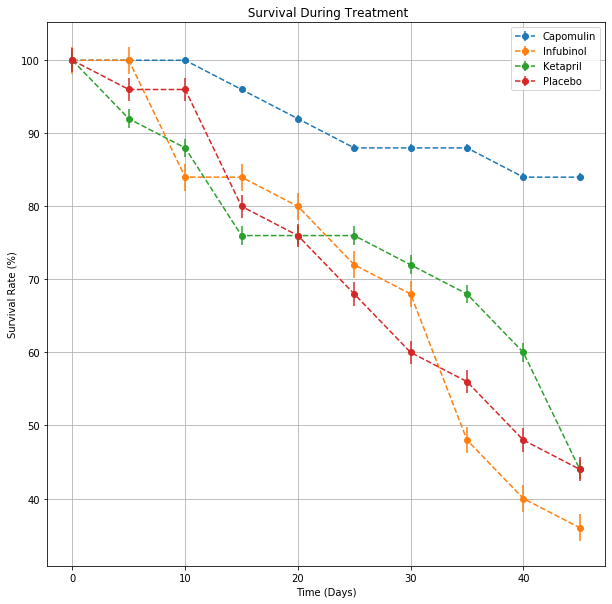

In [155]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize = (10, 10))

plt.errorbar(x=survival_Capomulin_Infubinol_Ketapril_Placebo_df['Timepoint'],y=survival_Capomulin_Infubinol_Ketapril_Placebo_df['Capomulin_percent'], linestyle="--", yerr=0.516398, fmt='o', label="Capomulin")
plt.errorbar(x=survival_Capomulin_Infubinol_Ketapril_Placebo_df['Timepoint'],y=survival_Capomulin_Infubinol_Ketapril_Placebo_df['Infubinol_percent'], linestyle="--", yerr=1.830604, fmt='o', label="Infubinol")
plt.errorbar(x=survival_Capomulin_Infubinol_Ketapril_Placebo_df['Timepoint'],y=survival_Capomulin_Infubinol_Ketapril_Placebo_df['Ketapril_percent'], linestyle="--", yerr=1.271919, fmt='o', label="Ketapril")
plt.errorbar(x=survival_Capomulin_Infubinol_Ketapril_Placebo_df['Timepoint'],y=survival_Capomulin_Infubinol_Ketapril_Placebo_df['Placebo_percent'], linestyle="--", yerr=1.622412, fmt='o', label="Placebo")

# Save the Figure
import os
path = os.path.join(os.path.expanduser("~"), "figures", "Survival During Treatment.png")


# Show the Figure
plt.ylabel("Survival Rate (%)")
plt.xlabel('Time (Days)')
plt.title(' Survival During Treatment')
plt.grid()
plt.legend()       
plt.show()



![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [124]:
# Calculate the percent changes for each drug
Capomulin_percentchange=(pivot_table["Capomulin"].iloc[9]-pivot_table["Capomulin"].iloc[0])/pivot_table["Capomulin"].iloc[0]*100

# Display the data to confirm
Capomulin_percentchange

-19.475302667894155

In [136]:
# Calculate the percent changes for each drug
Ceftamin_percentchange=(pivot_table["Ceftamin"].iloc[9]-pivot_table["Ceftamin"].iloc[0])/pivot_table["Ceftamin"].iloc[0]*100

# Display the data to confirm
Ceftamin_percentchange

42.516491855897414

In [125]:
# Calculate the percent changes for each drug
Infubinol_percentchange=(pivot_table["Infubinol"].iloc[9]-pivot_table["Infubinol"].iloc[0])/pivot_table["Infubinol"].iloc[0]*100

# Display the data to confirm
Infubinol_percentchange

46.12347172785184

In [126]:
# Calculate the percent changes for each drug
Ketapril_percentchange=(pivot_table["Ketapril"].iloc[9]-pivot_table["Ketapril"].iloc[0])/pivot_table["Ketapril"].iloc[0]*100

# Display the data to confirm
Ketapril_percentchange

57.02879468660604

In [127]:
# Calculate the percent changes for each drug
Naftisol_percentchange=(pivot_table["Naftisol"].iloc[9]-pivot_table["Naftisol"].iloc[0])/pivot_table["Naftisol"].iloc[0]*100

# Display the data to confirm
Naftisol_percentchange

53.923347134769195

In [138]:
# Calculate the percent changes for each drug
Placebo_percentchange=(pivot_table["Placebo"].iloc[9]-pivot_table["Placebo"].iloc[0])/pivot_table["Placebo"].iloc[0]*100

# Display the data to confirm
Placebo_percentchange

51.29796048315153

In [139]:
# Calculate the percent changes for each drug
Propriva_percentchange=(pivot_table["Propriva"].iloc[9]-pivot_table["Propriva"].iloc[0])/pivot_table["Propriva"].iloc[0]*100

# Display the data to confirm
Propriva_percentchange

47.24117486320634

In [140]:
# Calculate the percent changes for each drug
Ramicane_percentchange=(pivot_table["Ramicane"].iloc[9]-pivot_table["Ramicane"].iloc[0])/pivot_table["Ramicane"].iloc[0]*100

# Display the data to confirm
Ramicane_percentchange

-22.32090046276666

In [130]:
# Calculate the percent changes for each drug
Stelasyn_percentchange=(pivot_table["Stelasyn"].iloc[9]-pivot_table["Stelasyn"].iloc[0])/pivot_table["Stelasyn"].iloc[0]*100

# Display the data to confirm
Stelasyn_percentchange

52.085134287898995

In [131]:
# Calculate the percent changes for each drug
Zoniferol_percentchange=(pivot_table["Zoniferol"].iloc[9]-pivot_table["Zoniferol"].iloc[0])/pivot_table["Zoniferol"].iloc[0]*100

# Display the data to confirm
Zoniferol_percentchange

46.57975086509522

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

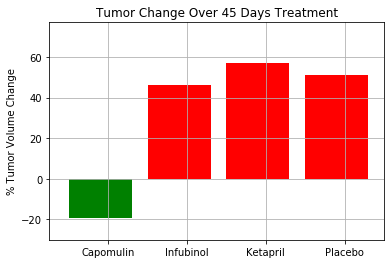

In [147]:
# Store all Relevant Percent Changes into a Tuple
percent_tuple = {'Capomulin': Capomulin_percentchange, 
                 'Infubinol': Infubinol_percentchange, 
                 'Ketapril': Ketapril_percentchange, 
                 'Placebo': Placebo_percentchange,
                }
percentchange_tumorvolume = pd.Series(percent_tuple)
percentchange_tumorvolume

# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc. 
# Use functions to label the percentages of changes
# Call functions to implement the function calls

summary_bar = plt.subplot()
x_axis = np.arange(0, len(percent_tuple))

tick_locations = []
for x in x_axis:
    tick_locations.append(x + 0.5)
plt.xticks(tick_locations, percent_tuple)

colors = []
for value in percentchange_tumorvolume:
    if value >= 0 :
        colors.append('r')
    else:
        colors.append('g')
        
percent_change = summary_bar.bar(x_axis, percentchange_tumorvolume, color=colors, align="edge")

plt.title("Tumor Change Over 45 Days Treatment")
plt.ylabel("% Tumor Volume Change")
plt.xlim(-0.25, len(percent_tuple))
plt.ylim(-30, max(percentchange_tumorvolume) + 20)
plt.grid()



# Save the Figure
import os
path = os.path.join(os.path.expanduser("~"), "figures", "Tumor Change Over 45 Day Treatment.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)